In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.duplicated().sum()
df=df.drop_duplicates()
df.shape

(299, 9)

In [11]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [15]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

## Feature Engineering

In [18]:
df.drop('Car_Name',axis=1,inplace=True)

In [21]:
df['car_age']=2025-df['Year']
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


In [23]:
df['car_age'].value_counts()

car_age
10    60
9     49
11    38
8     35
12    33
13    23
14    19
15    15
17     7
16     6
19     4
20     4
22     2
18     2
7      1
21     1
Name: count, dtype: int64

In [25]:
df.drop('Year',axis=1,inplace=True)

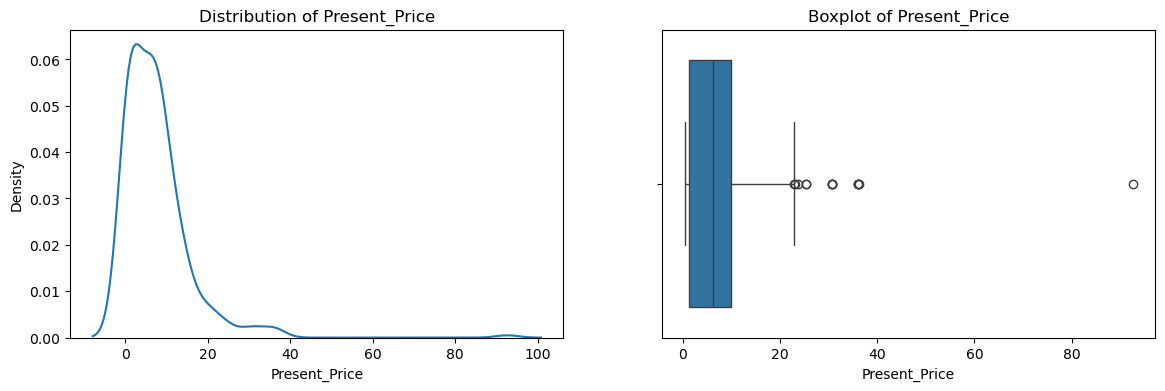

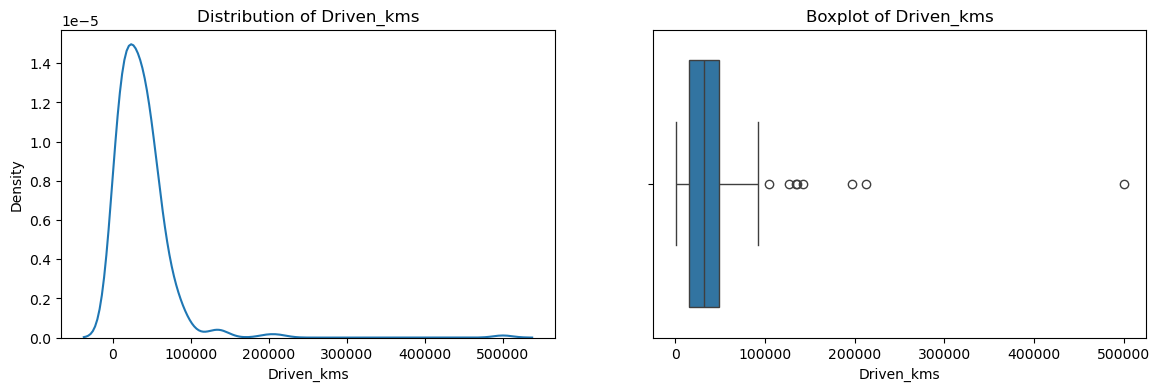

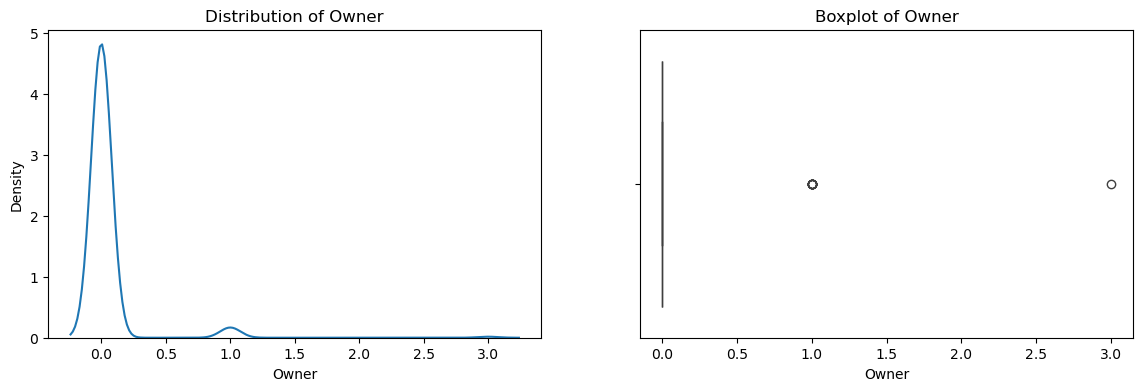

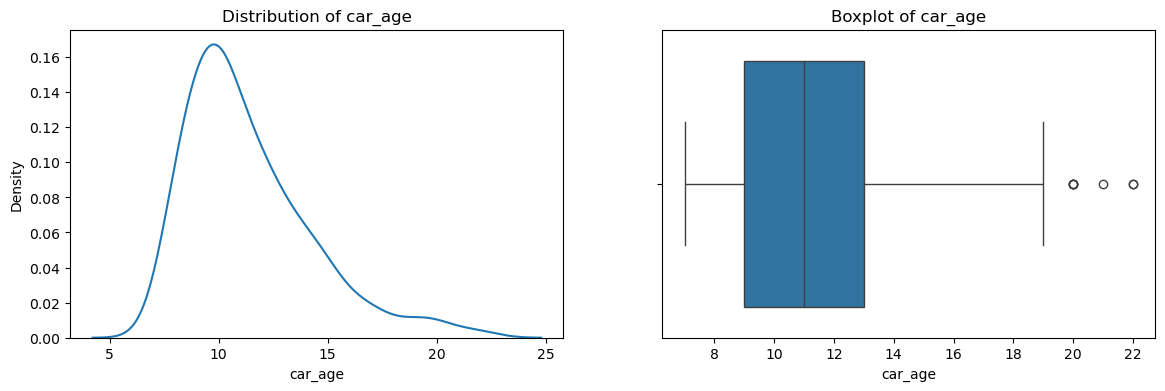

In [27]:

for col in df.columns:
    
    # Skip columns that are either categorical or the target variable
    if df[col].dtype == 'object' or col == 'Selling_Price':
        continue

    # Set up the figure for two subplots
    plt.figure(figsize=(14, 4))

    # Plot the KDE plot for the distribution of the column
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=df, x=col)
    plt.title(f'Distribution of {col}')

    # Plot the boxplot to show spread and outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, orient='h')
    plt.title(f'Boxplot of {col}')

    # Show the plots
    plt.show()

In [28]:
df.shape

(299, 8)

In [31]:
df['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

<Axes: xlabel='Owner', ylabel='count'>

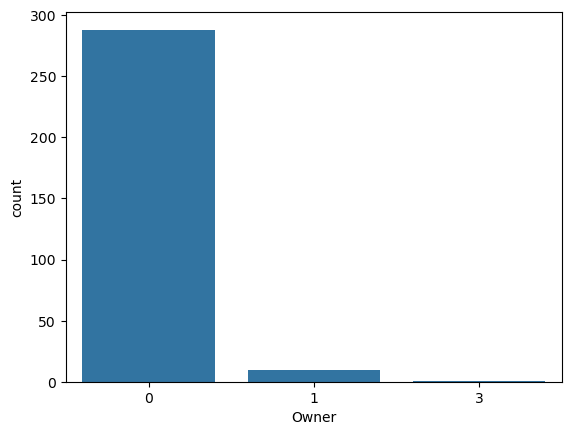

In [33]:
sns.countplot(data=df,x='Owner',)

## Outliers analysis

In [36]:
def lower_whisker(dataframe,column_name):
    q1 = np.percentile(dataframe[column_name], 25)
    q3 = np.percentile(dataframe[column_name], 75)
    iqr=q3-q1
    med=dataframe[column_name].median()
    lwr=q1-1.5*iqr
    upr=q3+1.5*iqr
    return(lwr,upr)
    

In [38]:
lower_bound,upper_bound=lower_whisker(df,'Driven_kms')
lower_bound,upper_bound

(-35825.25, 99708.75)

In [40]:
cond1=df['Driven_kms']>upper_bound
cond2=df['Driven_kms']<lower_bound

In [42]:
df['Driven_kms'][cond1|cond2]

37     127000
50     104707
53     135000
77     135154
84     197176
85     142000
179    213000
196    500000
Name: Driven_kms, dtype: int64

In [44]:
df[cond1|cond2]

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
37,0.35,2.28,127000,Petrol,Individual,Manual,0,22
50,14.90,30.61,104707,Diesel,Dealer,Automatic,0,13
53,16.00,30.61,135000,Diesel,Individual,Automatic,0,12
77,1.50,12.35,135154,Petrol,Dealer,Automatic,0,21
84,3.49,13.46,197176,Diesel,Dealer,Manual,0,20
85,2.50,23.73,142000,Petrol,Individual,Automatic,3,19
179,0.31,1.05,213000,Petrol,Individual,Manual,0,15
196,0.17,0.52,500000,Petrol,Individual,Automatic,0,17


In [46]:
lower_bound,upper_bound=lower_whisker(df,'Present_Price')
lower_bound,upper_bound

(-11.760000000000002, 22.8)

In [48]:
cols=['Fuel_Type','Selling_type','Transmission']
for i in cols:
    print(df[i].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [50]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
df_encoded

,Selling_Price,Present_Price,Driven_kms,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,9,True,False,False,True
297,4.00,5.90,60000,0,10,False,True,False,True
298,3.35,11.00,87934,0,16,False,True,False,True
299,11.50,12.50,9000,0,8,True,False,False,True


_____________

In [53]:
X=df_encoded.drop('Selling_Price',axis=1)
y=df_encoded['Selling_Price']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [57]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((239, 8), (60, 8), (239,), (60,))

In [59]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
LR.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred=LR.predict(X_test)

In [65]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('mae',mae)
print('mse',mse)
print('rmse',rmse)
print('r2',r2)

mae 1.0645723178893987
mse 1.7372419513533162
rmse 1.3180447455808608
r2 0.8317675494642188


In [67]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
y_pred=RF.predict(X_test)

In [71]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('mae',mae)
print('mse',mse)
print('rmse',rmse)
print('r2',r2)

mae 0.3924833333333336
mse 0.33054357766666675
rmse 0.5749291936114105
r2 0.9679905518995735


In [75]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 8.5 MB/s eta 0:00:18
   - -------------------------------------- 7.1/150.0 MB 21.8 MB/s eta 0:00:07
   ---- ----------------------------------- 15.5/150.0 MB 29.5 MB/s eta 0:00:05
   ----- ---------------------------------- 20.7/150.0 MB 28.4 MB/s eta 0:00:05
   ------ --------------------------------- 23.1/150.0 MB 27.5 MB/s eta 0:00:05
   ------ --------------------------------- 23.6/150.0 MB 21.6 MB/s eta 0:00:06
   ------ --------------------------------- 24.1/150.0 MB 18.6 MB/s eta 0:00:07
   ------ --------------------------------- 24.4/150.0 MB 16.3 MB/s eta 0:00:08
   ------ --------------------------------- 24.9/150.0 MB 14.2 MB/s eta 0:00:09
   ------ --------------------------------- 25.4/150.0 MB 12.8 MB/s eta 0:00:10
   ------ --------------------------------- 25.7/150.0 MB 12.1 MB/s eta 0:00:11
   -------- ------------------------------- 30.4/150

In [77]:
import xgboost as xgb

In [79]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

In [81]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [89]:
y_pred=xgb_model.predict(X_test)

In [91]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('mae',mae)
print('mse',mse)
print('rmse',rmse)
print('r2',r2)

mae 0.3896159635980924
mse 0.34732342769474356
rmse 0.5893415204232123
r2 0.9663656111205143
